* [1. The Attention Mechanism](#section-1)
* [2. The General Attention Mechanism](#section-2)
* [3. The General Attention Mechanism with NumPy and SciPy](#section-3)

* [Implementing Transformers From Scratch Using Pytorch](#section-4)
* [Implementing Transformers From Scratch Using TensorFlow](#section-5)

<a class="anchor" id="section-1"></a>
<h2 style="color:green;font-size: 2em;">1. The Attention Mechanism</h2>

The attention mechanism was introduced by [Bahdanau et al. (2014)](https://arxiv.org/abs/1409.0473) to address the bottleneck problem that arises with the use of a fixed-length encoding vector, where the decoder would have limited access to the information provided by the input. This is thought to become especially problematic for long and/or complex sequences, where the dimensionality of their representation would be forced to be the same as for shorter or simpler sequences.

Bahdanau et al.’s attention mechanism is divided into the step-by-step computations of the alignment scores, the weights, and the context vector:

1. **Alignment scores:**\
The alignment model takes the encoded hidden states, $\mathbf{h}_i$, and the previous decoder output, $\mathbf{s}_{t-1}$, to compute a score, $e_{t,i}$, that indicates how well the elements of the input sequence align with the current output at the position, $t$. The alignment model is represented by a function, $a(.)$, which can be implemented by a feedforward neural network:
$$e_{t,i} = a(\mathbf{s}_{t-1}, \mathbf{h}_i)$$

2. **Weights:**\
The weights, $\alpha_{t,i}$, are computed by applying a softmax operation to the previously computed alignment scores:
$$\alpha_{t,i} = \text{softmax}(e_{t,i})$$

3. **Context vector:**\
 A unique context vector, $\mathbf{c}_t$, is fed into the decoder at each time step. It is computed by a weighted sum of all, $T$, encoder hidden states:
$$\mathbf{c}_t = \sum_{i=1}^T \alpha_{t,i} \mathbf{h}_i$$

**Bahdanau et al. implemented an RNN for both the encoder and decoder.**

However, the attention mechanism can be re-formulated into a general form that can be applied to any sequence-to-sequence (abbreviated to seq2seq) task, where the information may not necessarily be related in a sequential fashion.

In other words, the database doesn’t have to consist of the hidden RNN states at different steps, but could contain any kind of information instead.

<a class="anchor" id="section-2"></a>
<h2 style="color:green;font-size: 2em;">2. The General Attention Mechanism</h2>

The general attention mechanism makes use of three main components, namely the queries, $\mathbf{Q}$, the keys, $\mathbf{K}$, and the values, $\mathbf{V}$. 

If you had to compare these three components to the attention mechanism as proposed by Bahdanau et al., then the query would be analogous to the previous decoder output, $\mathbf{s}_{t-1}$, while the values would be analogous to the encoded inputs, $\mathbf{h}_i$. In the Bahdanau attention mechanism, the keys and values are the same vector.

In this case, we can think of the vector $\mathbf{s}_{t-1}$ as a query executed against a database of key-value pairs, where the keys are vectors and the hidden states $\mathbf{h}_i$ are the values.

The general attention mechanism then performs the following computations:

Each query vector, $\mathbf{q} = \mathbf{s}_{t-1}$, is matched against a database of keys to compute a score value. This matching operation is computed as the dot product of the specific query under consideration with each key vector, $\mathbf{k}_i$: 
$$e_{\mathbf{q},\mathbf{k}_i} = \mathbf{q} \cdot \mathbf{k}_i$$

The scores are passed through a softmax operation to generate the weights:
$$\alpha_{\mathbf{q},\mathbf{k}_i} = \text{softmax}(e_{\mathbf{q},\mathbf{k}_i})$$

The generalized attention is then computed by a weighted sum of the value vectors, $\mathbf{v}_{\mathbf{k}_i}$, where each value vector is paired with a corresponding key:
$$\text{attention}(\mathbf{q}, \mathbf{K}, \mathbf{V}) = \sum_i \alpha_{\mathbf{q},\mathbf{k}_i} \mathbf{v}_{\mathbf{k}_i}$$

Within the context of machine translation, each word in an input sentence would be attributed its own query, key, and value vectors. These vectors are generated by multiplying the encoder’s representation of the specific word under consideration with three different weight matrices that would have been generated during training. 

In essence, when the generalized attention mechanism is presented with a sequence of words, it takes the query vector attributed to some specific word in the sequence and scores it against each key in the database. In doing so, it captures how the word under consideration relates to the others in the sequence. Then it scales the values according to the attention weights (computed from the scores) to retain focus on those words relevant to the query. In doing so, it produces an attention output for the word under consideration. 

<a class="anchor" id="section-3"></a>
<h2 style="color:green;font-size: 2em;">3. The General Attention Mechanism with NumPy and SciPy</h2>

In [ ]:
from numpy import array
from numpy import random
from numpy import dot
from scipy.special import softmax

First defining the word embeddings of the four different words to calculate the attention. In actual practice, these word embeddings would have been generated by an encoder; however, for this particular example, you will define them manually. 

In [ ]:
# encoder representations of four different words
word_1 = array([1, 0, 0])
word_2 = array([0, 1, 0])
word_3 = array([1, 1, 0])
word_4 = array([0, 0, 1])

Generates the weight matrices, which you will eventually multiply to the word embeddings to generate the queries, keys, and values. Here, you shall generate these weight matrices randomly; however, in actual practice, these would have been learned during training. 

In [ ]:
# generating the weight matrices
random.seed(42) # to allow us to reproduce the same attention values
W_Q = random.randint(3, size=(3, 3))
W_K = random.randint(3, size=(3, 3))
W_V = random.randint(3, size=(3, 3))

The number of rows of each of these matrices is equal to the dimensionality of the word embeddings (which in this case is three) to allow us to perform the matrix multiplication.

Subsequently, the query, key, and value vectors for each word are generated by multiplying each word embedding by each of the weight matrices. 

In [ ]:
# generating the queries, keys and values
query_1 = word_1 @ W_Q
key_1 = word_1 @ W_K
value_1 = word_1 @ W_V
 
query_2 = word_2 @ W_Q
key_2 = word_2 @ W_K
value_2 = word_2 @ W_V
 
query_3 = word_3 @ W_Q
key_3 = word_3 @ W_K
value_3 = word_3 @ W_V
 
query_4 = word_4 @ W_Q
key_4 = word_4 @ W_K
value_4 = word_4 @ W_V

Considering only the first word for the time being, the next step scores its query vector against all the key vectors using a dot product operation. 

In [ ]:
# scoring the first query vector against all key vectors
scores = array([dot(query_1, key_1), dot(query_1, key_2), dot(query_1, key_3), dot(query_1, key_4)])

The score values are subsequently passed through a softmax operation to generate the weights. Before doing so, it is common practice to divide the score values by the square root of the dimensionality of the key vectors (in this case, three) to keep the gradients stable.

In [ ]:
# computing the weights by a softmax operation
weights = softmax(scores / key_1.shape[0] ** 0.5)

Finally, the attention output is calculated by a weighted sum of all four value vectors. 

In [ ]:
# computing the attention by a weighted sum of the value vectors
attention = (weights[0] * value_1) + (weights[1] * value_2) + (weights[2] * value_3) + (weights[3] * value_4)
 
print(attention)

[0.98522025 1.74174051 0.75652026]


For faster processing, the same calculations can be implemented in matrix form to generate an attention output for all four words in one go:

In [ ]:
# encoder representations of four different words
word_1 = array([1, 0, 0])
word_2 = array([0, 1, 0])
word_3 = array([1, 1, 0])
word_4 = array([0, 0, 1])
 
# stacking the word embeddings into a single array
words = array([word_1, word_2, word_3, word_4])
 
# generating the weight matrices
random.seed(42)
W_Q = random.randint(3, size=(3, 3))
W_K = random.randint(3, size=(3, 3))
W_V = random.randint(3, size=(3, 3))
 
# generating the queries, keys and values
Q = words @ W_Q
K = words @ W_K
V = words @ W_V
 
# scoring the query vectors against all key vectors
scores = Q @ K.transpose()
 
# computing the weights by a softmax operation
weights = softmax(scores / K.shape[1] ** 0.5, axis=1)
 
# computing the attention by a weighted sum of the value vectors
attention = weights @ V
 
print(attention)

[[0.98522025 1.74174051 0.75652026]
 [0.90965265 1.40965265 0.5       ]
 [0.99851226 1.75849334 0.75998108]
 [0.99560386 1.90407309 0.90846923]]


<a class="anchor" id="section-4"></a>
<h1 align="center" style="color:green;font-size: 3em;" >Implementing Transformers From Scratch Using Pytorch</h1>

* [1. Introduction](#section1)
* [2. Import libraries](#section2)
* [3. Basic components](#section3)
  - [Create Word Embeddings](#section4)
  - [Positional Encoding](#section5)
  - [Self Attention](#section6)
* [4. Encoder](#section7)
* [5. Decoder](#section8)
* [6. Testing our code](#section9)

**To build our Transformer model, we’ll follow these steps:**

1. Import necessary libraries and modules
2. Define the basic building blocks: Multi-Head Attention, Position-wise Feed-Forward Networks, Positional Encoding
3. Build the Encoder and Decoder layers
4. Combine Encoder and Decoder layers to create the complete Transformer model
4. Prepare sample data
5. Train the model

<a class="anchor" id="section1"></a>
<h2 style="color:green;font-size: 2em;">1. Introduction</h2>

In this tutorial, I will explain, with support, the implement of transformers in "Attention is all you need paper" from scratch using Pytorch.
Basically transformer have an encoder-decoder architecture. It is common for language translation models.

```
Note: From Here I start to build my imagination and assumptions of transformers and not going for an indepth explaination of transformers.
I want to share it for the purpose of benefit others in this field.
```
I have dealt with this code and representation, by writing and following instructions, because it was a deep training of how these techniques work, and I shared it with fine illustration for those who want to check it, and take my insight and journey.


In [ ]:
# importing required libraries for images display
from IPython.display import Image
from IPython.core.display import HTML

In [ ]:
# unzip notenbook images zip file
!unzip notebook_images.zip

Archive:  notebook_images.zip
   creating: notebook_images/
  inflating: notebook_images/decoder_layer.png  
  inflating: notebook_images/embedding_vector.png  
  inflating: notebook_images/encoder_layer.png  
 extracting: notebook_images/positional_encoding_cos.png  
 extracting: notebook_images/positional_encoding_sin.png  
  inflating: notebook_images/the_transformer_encoders_decoders.png  
  inflating: notebook_images/the_transformer_encoder_decoder_stack.png  
 extracting: notebook_images/transformer_form.png  
  inflating: notebook_images/transformer_model.png  


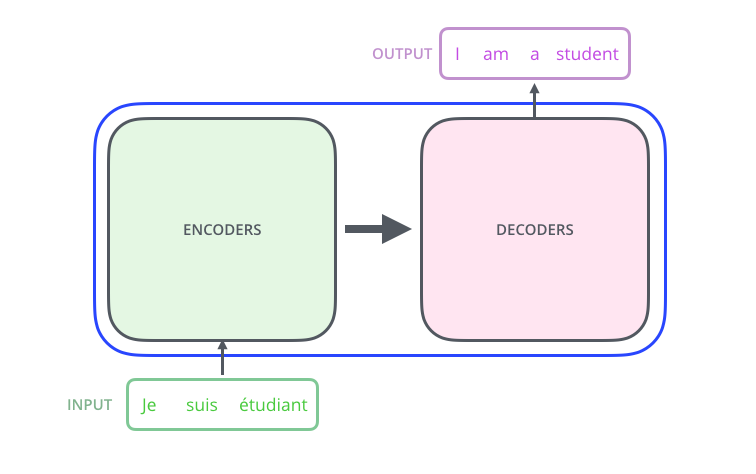

In [ ]:
PATH = r"/content/notebook_images"
Image(filename = PATH + '/' + "the_transformer_encoders_decoders.png")

The above image shows a language translation model from French to English. Actually we can use stack of encoder (one in top of each) and stack of decoders as the image below:

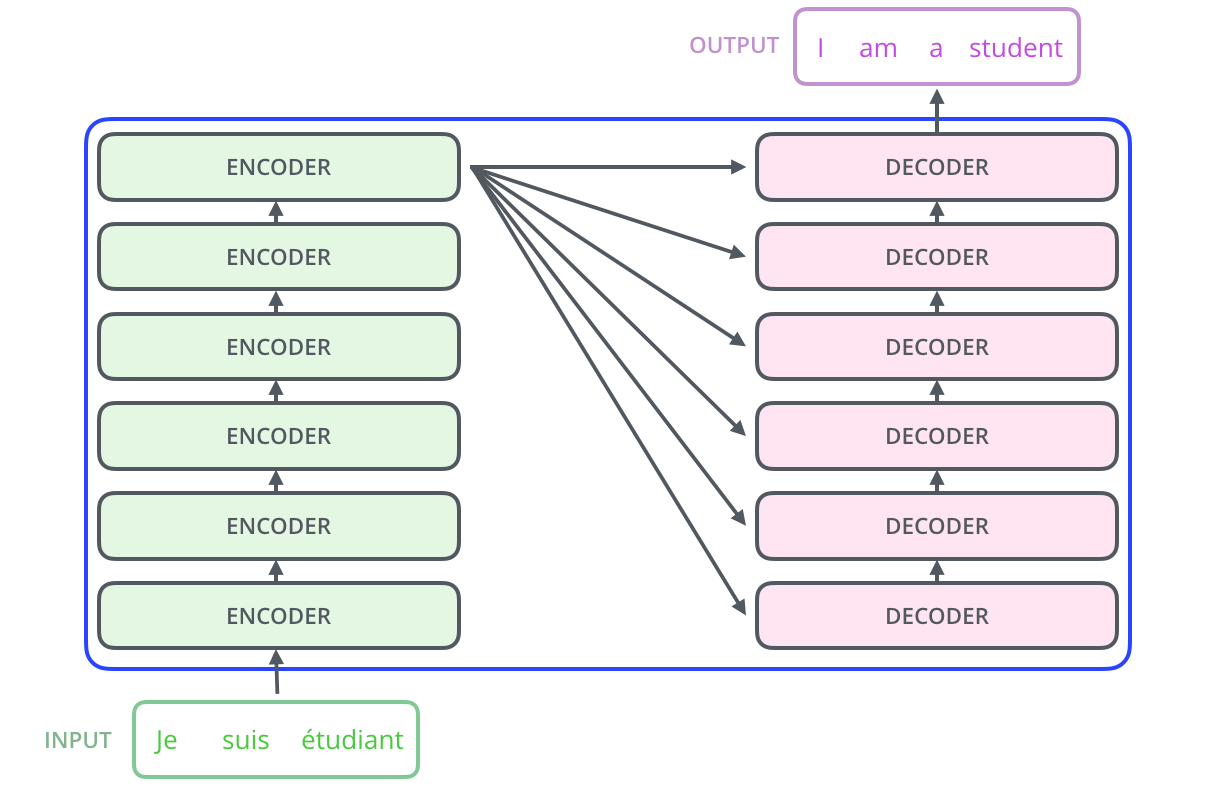

In [ ]:
Image(filename = PATH + '/' + "the_transformer_encoder_decoder_stack.png")

Full fledged image of our attention model.

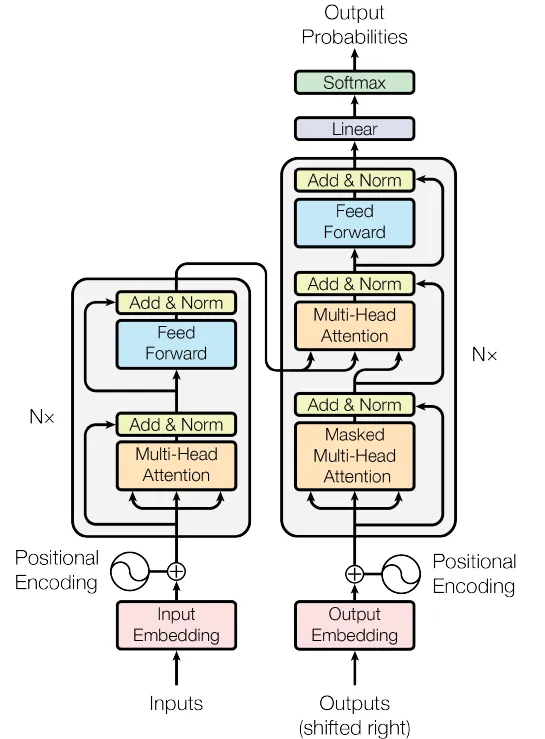

In [ ]:
Image(filename = PATH + '/' + "transformer_model.png")

<a class="anchor" id="section2"></a>
<h2 style="color:green;font-size: 2em;">2. Importing necessary Libraries</h2>

In [ ]:
# importing required libraries for transformer
import torch.nn as nn
import torch
import torch.nn.functional as F
import math,copy,re
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import torchtext
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")
print(torch.__version__)

2.0.0+cu118


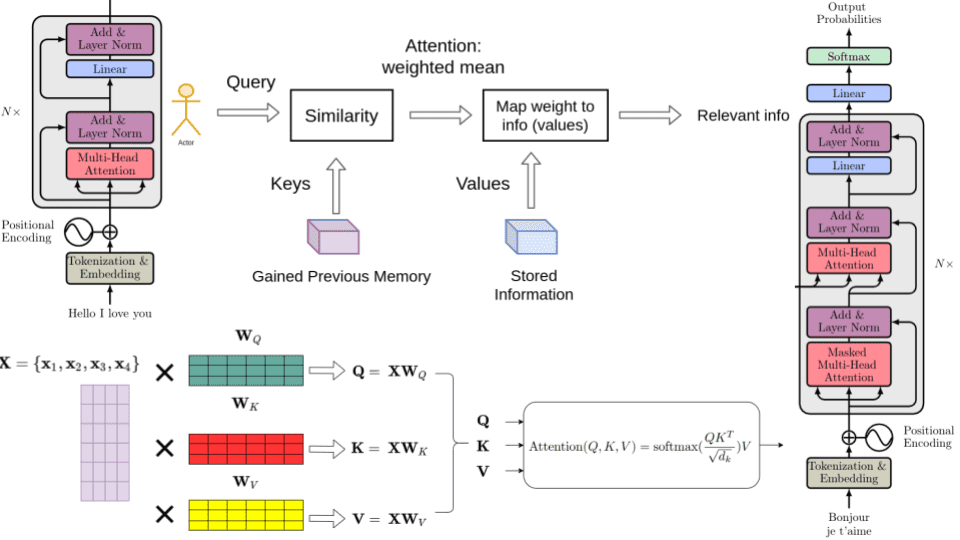

In [ ]:
Image(filename = PATH + '/' + "transformer_form.png")

<a class="anchor" id="section3"></a>
<h2 style="color:green;font-size: 2em;"> Basic components</h2>

<a class="anchor" id="section4"></a>
<h3 style="color:green;"> Create Word Embeddings</h3>

**Discuss functional units**
* First of all we need to convert each word in the input sequence to an embedding vector. Embedding vectors will create a more semantic representation of each word.

In [ ]:
class Embedding(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        """
        Args:
            vocab_size: size of vocabulary
            embed_dim: dimension of embeddings
        """
        super(Embedding, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
    def forward(self, x):
        """
        Args:
            x: input vector
        Returns:
            out: embedding vector
        """
        out = self.embed(x)
        return out

<a class="anchor" id="section5"></a>
<h3 style="color:green">Positional Encoding</h3>

**Discuss functional units**
* Next step is to generate positional encoding. Inorder for the model to make sense of the sentence, it needs to know two things about the each word.

In "attention is all you need paper" author used the following functions to create positional encoding. On odd time steps a `cosine` function is used and in even time steps a `sine` function is used.

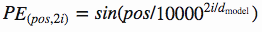

In [ ]:
Image(filename = PATH + '/' + "positional_encoding_sin.png")

In [ ]:
Image(filename = PATH + '/' + "positional_encoding_cos.png")

```
pos -> refers to order in the sentence
i -> refers to position along embedding vector dimension
```

**Discuss the results**
* Positional embedding will generate a matrix of similar to embedding matrix. It will create a matrix of dimension sequence length x embedding dimension.

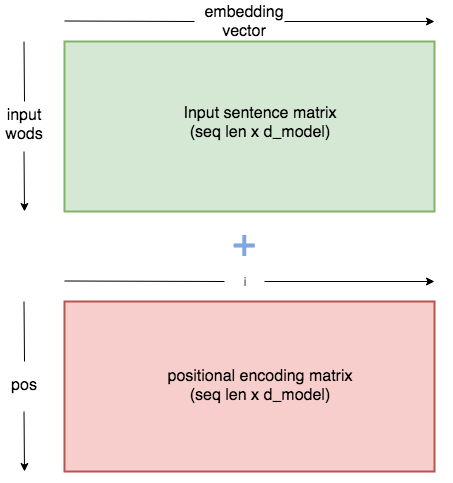

In [ ]:
Image(filename = PATH + '/' + "embedding_vector.png")

In [ ]:
class PositionalEmbedding(nn.Module):
    def __init__(self, max_seq_len, embed_model_dim):
        """
        Args:
            seq_len: length of input sequence
            embed_model_dim: demension of embedding
        """
        super(PositionalEmbedding, self).__init__()
        self.embed_dim = embed_model_dim

        pe = torch.zeros(max_seq_len, self.embed_dim)
        for pos in range(max_seq_len):
            for i in range(0, self.embed_dim, 2):
                pe[pos, i] = math.sin(pos / (10000 ** ((2 * i)/self.embed_dim)))
                pe[pos, i + 1] = math.cos(pos / (10000 ** ((2 * (i + 1))/self.embed_dim)))
        pe = pe.unsqueeze(0)
        # register buffer in Pytorch ->
        # If you have parameters in your model, which should be saved and restored in the state_dict,
        # but not trained by the optimizer, you should register them as buffers.
        self.register_buffer('pe', pe)


    def forward(self, x):
        """
        Args:
            x: input vector
        Returns:
            x: output
        """
      
        # make embeddings relatively larger
        x = x * math.sqrt(self.embed_dim)
        #add constant to embedding
        seq_len = x.size(1)
        x = x + torch.autograd.Variable(self.pe[:,:seq_len], requires_grad=False)
        return x

**Discuss the results**
* The `PositionalEncoding` class initializes with input parameters that creating a tensor to store positional encoding values. The class calculates sine and cosine values for even and odd indices, respectively, based on the scaling factor. The forward method computes the positional encoding by adding the stored positional encoding values to the input tensor, allowing the model to capture the position information of the input sequence.

<a class="anchor" id="section6"></a>
<h2 style="color:green"> Self Attention</h2>

Let me give a glimpse on Self Attention and Multihead attention

***What is self attention?***

As model proceeses each word, self attention allows it to look at other positions in the input sequence for clues. It will creates a vector based on dependency of each word with the other.

Let us go through a step by step illustration of self attention.

* **Step 1:** The first step in calculating self-attention is to create three vectors from each of the encoder’s input vectors (in this case, the embedding of each word). So for each word, we create a Query vector, a Key vector, and a Value vector. Each of the vector will be of dimension 1x64.

Since we have a multihead attention we will have 8 self attention heads.I will explain the code with 8 attention head in mind.

**How key,queries and values can be created?**

We will have a key matrix, query matrix and a value matrix to generate key, query and value.
These matrixes are learned during training.

```
code hint:
Suppose we have batch_size=32,sequence_length=10, embedding dimension=512. So after embedding and positional encoding our output will be of dimension 32x10x512.
We will resize it to 32x10x8x64.(About 8, it is the number of heads in multihead attention.Dont worry you will get to know about it once you go through the code.).

```


* **Step 2:**  Second step is to calculate the score. ie, we will multiply query marix with key matrix. [Q x K.t]

```
code hint:
Suppose our key,query and value dimension be 32x10x8x64. Before proceeding further, we will transpose each of them for multiplication convinience (32x8x10x64). Now multiply query matrix with transpose key matrix. ie (32x8x10x64) x (32x8x64x10) -> (32x8x10x10).
```


* **Step 3:** Now divide the output matrix with square root of dimension of key matrix and then apply Softmax over it. 

```
code hint: we will divide 32x8x10x10 vector by 8 ie, by square root of 64 (dimension of key matrix)
```


* **Step 4:** Then this gets multiply it with value matrix.

```
code hint:
After step 3 our output will be of dimension 32x8x10x10. Now muliply it with value matrix (32x8x10x64) to get output of dimension (32x8x10x64).Here 8 is the number of attention heads and 10 is the sequence length.Thus for each word we have 64 dim vector.
```

* **Step 5:** Once we have this we will pass this through a linear layer. This forms the output of multihead attention.

```
code hint:
(32x8x10x64) vector gets transposed to (32x10x8x64) and then reshaped as (32x10x512).Then it is passed through a linear layer to get output of (32x10x512).
```

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim = 512, n_heads = 8):
        """
        Args:
            embed_dim: dimension of embeding vector output
            n_heads: number of self attention heads
        """
        super(MultiHeadAttention, self).__init__()

        self.embed_dim = embed_dim    # 512 dim
        self.n_heads = n_heads   # 8
        self.single_head_dim = int(self.embed_dim / self.n_heads)   # 512/8 = 64. each key,query, value will be of 64d
       
        # key,query and value matrixes    # 64 x 64   
        self.query_matrix = nn.Linear(self.single_head_dim , self.single_head_dim ,bias=False)  # single key matrix for all 8 keys #512x512
        self.key_matrix = nn.Linear(self.single_head_dim  , self.single_head_dim, bias=False)
        self.value_matrix = nn.Linear(self.single_head_dim ,self.single_head_dim , bias=False)
        self.out = nn.Linear(self.n_heads * self.single_head_dim ,self.embed_dim) 

    def forward(self, key, query, value, mask = None):    #batch_size x sequence_length x embedding_dim    # 32 x 10 x 512
        
        """
        Args:
           key : key vector
           query : query vector
           value : value vector
           mask: mask for decoder
        
        Returns:
           output vector from multihead attention
        """
        batch_size = key.size(0)
        seq_length = key.size(1)
        
        # query dimension can change in decoder during inference. 
        # so we cant take general seq_length
        seq_length_query = query.size(1)
        
        # 32x10x512
        key = key.view(batch_size, seq_length, self.n_heads, self.single_head_dim)  #batch_size x sequence_length x n_heads x single_head_dim = (32x10x8x64)
        query = query.view(batch_size, seq_length_query, self.n_heads, self.single_head_dim) #(32x10x8x64)
        value = value.view(batch_size, seq_length, self.n_heads, self.single_head_dim) #(32x10x8x64)
       
        k = self.key_matrix(key)       # (32x10x8x64)
        q = self.query_matrix(query)   
        v = self.value_matrix(value)

        q = q.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)    # (32 x 8 x 10 x 64)
        k = k.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)
        v = v.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)
       
        # computes attention
        # adjust key for matrix multiplication
        k_adjusted = k.transpose(-1,-2)  # (batch_size, n_heads, single_head_dim, seq_ken)  # (32 x 8 x 64 x 10)
        product = torch.matmul(q, k_adjusted)  # (32 x 8 x 10 x 64) x (32 x 8 x 64 x 10) = # (32x8x10x10)
      
        
        # fill those positions of product matrix as (-1e20) where mask positions are 0
        if mask is not None:
             product = product.masked_fill(mask == 0, float("-1e20"))

        # divising by square root of key dimension
        product = product / math.sqrt(self.single_head_dim) # / sqrt(64)

        # applying softmax
        scores = F.softmax(product, dim=-1)
 
        # mutiply with value matrix
        scores = torch.matmul(scores, v)  ## (32x8x 10x 10) x (32 x 8 x 10 x 64) = (32 x 8 x 10 x 64) 
        
        # concatenated output
        concat = scores.transpose(1,2).contiguous().view(batch_size, seq_length_query, self.single_head_dim*self.n_heads)  # (32x8x10x64) -> (32x10x8x64)  -> (32,10,512)
        
        output = self.out(concat) #(32,10,512) -> (32,10,512)
       
        return output

<a class="anchor" id="section7"></a>
<h2 style="color:green;font-size: 2em;"> 4. Encoder</h2>

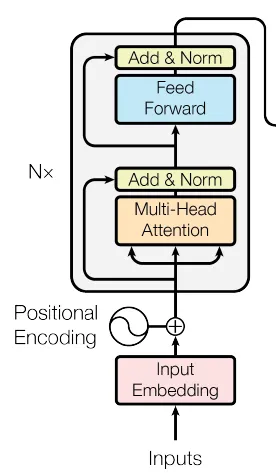

In [ ]:
Image(filename = PATH + '/' + "encoder_layer.png")

In the encoder section we will follow these sections:

**Step 1:** First input(padded tokens corresponding to the sentence) get passes through embedding layer and positional encoding layer.

```
code hint
suppose we have input of 32x10 (batch size=32 and sequence length=10). Once it passes through embedding layer it becomes 32x10x512. Then it gets added with correspondng positional encoding vector and produces output of 32x10x512. This gets passed to the multihead attention
```

**Step 2:** As discussed above it will passed through the multihead attention layer and creates useful representational matrix as output.

```
code hint
input to multihead attention will be a 32x10x512 from which key,query and value vectors are generated as above and finally produces a 32x10x512 output.
```

**Step 3:** Next we have a normalization and residual connection. The output from multihead attention is added with its input and then normalized. 

```
code hint
output of multihead attention which is 32x10x512 gets added with 32x10x512 input(which is output created by embedding vector) and then the layer is normalized.

```

**Step 4:** Next we have a feed forward layer and a then normalization layer with residual connection from input(input of feed forward layer) where we passes the output after normalization though it and finally gets the output of encoder.

```
code hint
The normalized output will be of dimension 32x10x512. This gets passed through 2 linear layers: 32x10x512 -> 32x10x2048 -> 32x10x512. Finally we have a residual connection which gets added with the output and the layer is normalized. Thus a 32x10x512 dimensional vector is created as output for the encoder.

```

**Discuss functional units**
* An `Encoder layer` consists of a Multi-Head Attention layer, a Position-wise Feed-Forward layer, and two Layer Normalization layers.

In [ ]:
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, expansion_factor=4, n_heads=8):
        super(TransformerBlock, self).__init__()
        
        """
        Args:
           embed_dim: dimension of the embedding
           expansion_factor: fator ehich determines output dimension of linear layer
           n_heads: number of attention heads
        
        """
        self.attention = MultiHeadAttention(embed_dim, n_heads)
        
        self.norm1 = nn.LayerNorm(embed_dim) 
        self.norm2 = nn.LayerNorm(embed_dim)
        
        self.feed_forward = nn.Sequential(
                          nn.Linear(embed_dim, expansion_factor*embed_dim),
                          nn.ReLU(),
                          nn.Linear(expansion_factor*embed_dim, embed_dim)
        )

        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)

    def forward(self,key,query,value):
        
        """
        Args:
           key: key vector
           query: query vector
           value: value vector
           norm2_out: output of transformer block
        
        """
        
        attention_out = self.attention(key,query,value)  #32x10x512
        attention_residual_out = attention_out + value  #32x10x512
        norm1_out = self.dropout1(self.norm1(attention_residual_out)) #32x10x512

        feed_fwd_out = self.feed_forward(norm1_out) #32x10x512 -> #32x10x2048 -> 32x10x512
        feed_fwd_residual_out = feed_fwd_out + norm1_out #32x10x512
        norm2_out = self.dropout2(self.norm2(feed_fwd_residual_out)) #32x10x512

        return norm2_out



class TransformerEncoder(nn.Module):
    """
    Args:
        seq_len : length of input sequence
        embed_dim: dimension of embedding
        num_layers: number of encoder layers
        expansion_factor: factor which determines number of linear layers in feed forward layer
        n_heads: number of heads in multihead attention
        
    Returns:
        out: output of the encoder
    """
    def __init__(self, seq_len, vocab_size, embed_dim, num_layers=2, expansion_factor=4, n_heads=8):
        super(TransformerEncoder, self).__init__()
        
        self.embedding_layer = Embedding(vocab_size, embed_dim)
        self.positional_encoder = PositionalEmbedding(seq_len, embed_dim)

        self.layers = nn.ModuleList([TransformerBlock(embed_dim, expansion_factor, n_heads) for i in range(num_layers)])
    
    def forward(self, x):
        embed_out = self.embedding_layer(x)
        out = self.positional_encoder(embed_out)
        for layer in self.layers:
            out = layer(out,out,out)

        return out  #32x10x512

**Discuss the results**
* The `EncoderLayer` class initializes with input parameters and components, including a `MultiHeadAttention` module, a `PositionWiseFeedForward` module, two layer `normalization` modules, and a `dropout` layer. The forward methods computes the encoder layer output by applying `self-attention`, adding the attention output to the input tensor, and normalizing the result. Then, it computes the position-wise feed-forward output, combines it with the normalized self-attention output, and normalizes the final result before returning the processed tensor.

<a class="anchor" id="section8"></a>
<h2 style="color:green;font-size: 2em;"> 5. Decoder</h2>

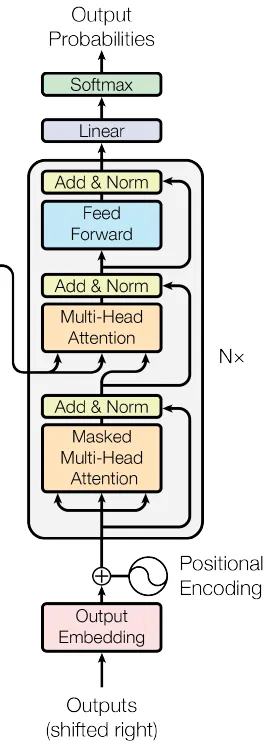

In [ ]:
Image(filename = PATH + '/' + "decoder_layer.png")

We will use the output of encoder to generate key and value vectors for the decoder.There are two kinds of multi head attention in the decoder.One is the decoder attention and other is the encoder decoder attention.

Let us explain with respect to the training phase.

**Step 1:**

First the output  gets passed through the embeddin and positional encoding to create a embedding vector of dimension 1x512 corresponding to each word in the target sequence.

```
code hint
Suppose we have a sequence length of 10. batch size of 32 and embedding vector dimension of 512. we have input of size 32x10 to the embedding matrix which produces and output of dimension 32x10x512 which gets added with the positional encoding of same dimension and produces a 32x10x512 out

```

**Step 2:**

The embeddig output gets passed through a multihead attention layers as before(creating key,query and value matrixes from the target input) and produces an output vector. This time the major difference is that we uses a mask with multihead attention. 

**Why mask?**

Mask is used because while creating attention of target words, we donot need a word to look in to the future words to check the dependency. ie, we already learned that why we create attention because we need to know contribution of each word with the other word. Since we are creating attention for words in target sequnce, we donot need a particular word to see the future words. For eg: in word "I am a strudent", we donot need the word "a" to look word "student".


```
code hint
For creating attention we created a triangular matrix with 1 and 0.eg:traingular matrix for seq length 5 looks as below:

1 0 0 0 0
1 1 0 0 0
1 1 1 0 0
1 1 1 1 0
1 1 1 1 1

After the key gets multiplied with query, we fill all zero positions with negative inifinity, In code we will fill it with a very small number to avoid division errors.
(with -1e 20)


```

**Step 3:**

As before we have a add and norm layer where we add with output of embedding with attention out and normalized it.


**Step 4:**


Next we have another multihead attention and then a add and norm layer. This multihead attention is called encoder-decorder multihead attention. For this multihead attention we create we create key and value vectors from the encoder output. Query is created from the output of previous decoder layer.

```
code hint:
Thus we have 32x10x512 out from encoder out. key and value for all words are generated from it. Similary query matrix is generated from otput from previous layer of decoder(32x10x512).

```

Thus it is passed through a multihead atention (we used number of heads = 8) the through a Add and Norm layer. Here the output from previous encoder layer(ie previoud add and norm layer) gets added with encoder-decoder attention output and then normalized.

**Step 5:**
Next we have a feed forward layer(linear layer) with add and nom which is similar to that of present in the encoder.


**Step 6:**
Finally we create a linear layer with length equal to number of words in total target corpus and a softmax function with it to get probablity of each word.

**Discuss functional units**
* A `Decoder` layer consists of two Multi-Head Attention layers, a Position-wise Feed-Forward layer, and three Layer Normalization layers.

In [ ]:
class DecoderBlock(nn.Module):
    def __init__(self, embed_dim, expansion_factor=4, n_heads=8):
        super(DecoderBlock, self).__init__()

        """
        Args:
           embed_dim: dimension of the embedding
           expansion_factor: fator ehich determines output dimension of linear layer
           n_heads: number of attention heads
        
        """
        self.attention = MultiHeadAttention(embed_dim, n_heads=8)
        self.norm = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(0.2)
        self.transformer_block = TransformerBlock(embed_dim, expansion_factor, n_heads)
        
    
    def forward(self, key, query, x,mask):
        
        """
        Args:
           key: key vector
           query: query vector
           value: value vector
           mask: mask to be given for multi head attention 
        Returns:
           out: output of transformer block
    
        """
        
        #we need to pass mask mask only to fst attention
        attention = self.attention(x,x,x,mask=mask) #32x10x512
        value = self.dropout(self.norm(attention + x))
        
        out = self.transformer_block(key, query, value)

        
        return out


class TransformerDecoder(nn.Module):
    def __init__(self, target_vocab_size, embed_dim, seq_len, num_layers=2, expansion_factor=4, n_heads=8):
        super(TransformerDecoder, self).__init__()
        """  
        Args:
           target_vocab_size: vocabulary size of taget
           embed_dim: dimension of embedding
           seq_len : length of input sequence
           num_layers: number of encoder layers
           expansion_factor: factor which determines number of linear layers in feed forward layer
           n_heads: number of heads in multihead attention
        
        """
        self.word_embedding = nn.Embedding(target_vocab_size, embed_dim)
        self.position_embedding = PositionalEmbedding(seq_len, embed_dim)

        self.layers = nn.ModuleList(
            [
                DecoderBlock(embed_dim, expansion_factor=4, n_heads=8) 
                for _ in range(num_layers)
            ]

        )
        self.fc_out = nn.Linear(embed_dim, target_vocab_size)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x, enc_out, mask):
        
        """
        Args:
            x: input vector from target
            enc_out : output from encoder layer
            trg_mask: mask for decoder self attention
        Returns:
            out: output vector
        """
            
        
        x = self.word_embedding(x)  #32x10x512
        x = self.position_embedding(x) #32x10x512
        x = self.dropout(x)
     
        for layer in self.layers:
            x = layer(enc_out, x, enc_out, mask) 

        out = F.softmax(self.fc_out(x))

        return out

**Discuss the results**
* The `DecoderLayer` initializes with input parameters and components such as `MultiHeadAttention` modules for masked `self-attention` and `cross-attention`, a `PositionWiseFeedForward` module, three layer `normalization` modules, and a `dropout` layer.

**Finally we will arrange all submodules and creates the entire tranformer architecture.**

In [ ]:
class Transformer(nn.Module):
    def __init__(self, embed_dim, src_vocab_size, target_vocab_size, seq_length,num_layers=2, expansion_factor=4, n_heads=8):
        super(Transformer, self).__init__()
        
        """  
        Args:
           embed_dim:  dimension of embedding 
           src_vocab_size: vocabulary size of source
           target_vocab_size: vocabulary size of target
           seq_length : length of input sequence
           num_layers: number of encoder layers
           expansion_factor: factor which determines number of linear layers in feed forward layer
           n_heads: number of heads in multihead attention
        
        """
        
        self.target_vocab_size = target_vocab_size

        self.encoder = TransformerEncoder(seq_length, src_vocab_size, embed_dim, num_layers=num_layers, expansion_factor=expansion_factor, n_heads=n_heads)
        self.decoder = TransformerDecoder(target_vocab_size, embed_dim, seq_length, num_layers=num_layers, expansion_factor=expansion_factor, n_heads=n_heads)
        
    
    def make_trg_mask(self, trg):
        """
        Args:
            trg: target sequence
        Returns:
            trg_mask: target mask
        """
        batch_size, trg_len = trg.shape
        # returns the lower triangular part of matrix filled with ones
        trg_mask = torch.tril(torch.ones((trg_len, trg_len))).expand(
            batch_size, 1, trg_len, trg_len
        )
        return trg_mask    

    def decode(self,src,trg):
        """
        for inference
        Args:
            src: input to encoder 
            trg: input to decoder
        out:
            out_labels : returns final prediction of sequence
        """
        trg_mask = self.make_trg_mask(trg)
        enc_out = self.encoder(src)
        out_labels = []
        batch_size,seq_len = src.shape[0],src.shape[1]
        #outputs = torch.zeros(seq_len, batch_size, self.target_vocab_size)
        out = trg
        for i in range(seq_len): #10
            out = self.decoder(out,enc_out,trg_mask) #bs x seq_len x vocab_dim
            # taking the last token
            out = out[:,-1,:]
     
            out = out.argmax(-1)
            out_labels.append(out.item())
            out = torch.unsqueeze(out,axis=0)
          
        
        return out_labels
    
    def forward(self, src, trg):
        """
        Args:
            src: input to encoder 
            trg: input to decoder
        out:
            out: final vector which returns probabilities of each target word
        """
        trg_mask = self.make_trg_mask(trg)
        enc_out = self.encoder(src)
   
        outputs = self.decoder(trg, enc_out, trg_mask)
        return outputs

<a class="anchor" id="section9"></a>
<h2 style="color:green;font-size: 2em;"> 6. Testing Our code </h2>

Suppose we have input sequence oflength 10 and target sequence of length 10.

In [ ]:
src_vocab_size = 11
target_vocab_size = 11
num_layers = 6
seq_length= 12


# let 0 be sos token and 1 be eos token
src = torch.tensor([[0, 2, 5, 6, 4, 3, 9, 5, 2, 9, 10, 1], 
                    [0, 2, 8, 7, 3, 4, 5, 6, 7, 2, 10, 1]])
target = torch.tensor([[0, 1, 7, 4, 3, 5, 9, 2, 8, 10, 9, 1], 
                       [0, 1, 5, 6, 2, 4, 7, 6, 2, 8, 10, 1]])

print(src.shape,target.shape)
model = Transformer(embed_dim=512, src_vocab_size=src_vocab_size, 
                    target_vocab_size=target_vocab_size, seq_length=seq_length,
                    num_layers=num_layers, expansion_factor=4, n_heads=8)
model

torch.Size([2, 12]) torch.Size([2, 12])


Transformer(
  (encoder): TransformerEncoder(
    (embedding_layer): Embedding(
      (embed): Embedding(11, 512)
    )
    (positional_encoder): PositionalEmbedding()
    (layers): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadAttention(
          (query_matrix): Linear(in_features=64, out_features=64, bias=False)
          (key_matrix): Linear(in_features=64, out_features=64, bias=False)
          (value_matrix): Linear(in_features=64, out_features=64, bias=False)
          (out): Linear(in_features=512, out_features=512, bias=True)
        )
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (feed_forward): Sequential(
          (0): Linear(in_features=512, out_features=2048, bias=True)
          (1): ReLU()
          (2): Linear(in_features=2048, out_features=512, bias=True)
        )
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): 

In [ ]:
out = model(src, target)
out.shape

torch.Size([2, 12, 11])

In [ ]:
# inference
model = Transformer(embed_dim=512, src_vocab_size=src_vocab_size, 
                    target_vocab_size=target_vocab_size, seq_length=seq_length, 
                    num_layers=num_layers, expansion_factor=4, n_heads=8)
                  


src = torch.tensor([[0, 2, 5, 6, 4, 3, 9, 5, 2, 9, 10, 1]])
trg = torch.tensor([[0]])
print(src.shape,trg.shape)
out = model.decode(src, trg)
out

torch.Size([1, 12]) torch.Size([1, 1])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# inference
model = Transformer(embed_dim=512, src_vocab_size=src_vocab_size, 
                    target_vocab_size=target_vocab_size, seq_length=seq_length, 
                    num_layers=num_layers, expansion_factor=4, n_heads=8)
                  


src = torch.tensor([[0, 2, 5, 6, 4, 3, 9, 5, 2, 9, 10, 1]])
trg = torch.tensor([[0]])
print(src.shape,trg.shape)
out = model.decode(src, trg)
out

torch.Size([1, 12]) torch.Size([1, 1])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

```Copyright 2019 The TensorFlow Authors.```

```
@title Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
```

<a class="anchor" id="section-5"></a>
<h1 align="center" style="color:Blue;font-size: 3em;" >Implementing Transformers From Scratch Using TensorFlow</h1>

* [1. Introduction](#section10)
* [2. Import libraries](#section11)
* [3. Positional encoding](#section12)
* [4. Scaled dot product attention](#section13)
* [5. Multi-head attention](#section14)
* [6. Point wise feed forward network](#section15)
* [7. Encoder and decoder](#section16)
	- [Encoder layer](#section17)
	- [Decoder layer](#section18)
	- [Encoder](#section19)
	- [Decoder](#section20)
* [8. Create the Transformer](#section21)
* [9. Set hyperparameters](#section22)
* [10. Optimizer](#section23)
* [11. Loss and metrics](#section24)
* [12. Training and checkpointing](#section25)
* [13. Evaluate](#section26)

<a class="anchor" id="section10"></a>
<h2 style="color:blue;font-size: 2em;">1. Introduction</h2>

This tutorial trains a <a href="https://arxiv.org/abs/1706.03762" class="external">Transformer model</a> to translate Portuguese to English.

The core idea behind the Transformer model is *self-attention*—the ability to attend to different positions of the input sequence to compute a representation of that sequence. Transformer creates stacks of self-attention layers and is explained below in the sections *Scaled dot product attention* and *Multi-head attention*.

A transformer model handles variable-sized input using stacks of self-attention layers instead of [RNNs]or [CNNsThis general architecture has a number of advantages:

* It make no assumptions about the temporal/spatial relationships across the data. This is ideal for processing a set of objects
* Layer outputs can be calculated in parallel, instead of a series like an RNN.
* Distant items can affect each other's output without passing through many RNN-steps, or convolution layers (see [Scene Memory Transformer](https://arxiv.org/pdf/1903.03878.pdf) for example).
* It can learn long-range dependencies. This is a challenge in many sequence tasks.

The downsides of this architecture are:

* For a time-series, the output for a time-step is calculated from the *entire history* instead of only the inputs and current hidden-state. This _may_ be less efficient.   
* If the input *does* have a  temporal/spatial relationship, like text, some positional encoding must be added or the model will effectively see a bag of words. 

After training the model in this notebook, you will be able to input a Portuguese sentence and return the English translation.

<img src="https://www.tensorflow.org/images/tutorials/transformer/attention_map_portuguese.png" width="800" alt="Attention heatmap">

<a class="anchor" id="section11"></a>
<h2 style="color:blue;font-size: 2em;">2. Import libraries</h2>

In [ ]:
# !pip install -q tfds-nightly

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

import time
import numpy as np
import matplotlib.pyplot as plt

<a class="anchor" id="section12"></a>
<h2 style="color:blue;font-size: 2em;">3. Setup input pipeline</h2>

Use [TFDS](https://www.tensorflow.org/datasets) to load the [Portugese-English translation dataset](https://github.com/neulab/word-embeddings-for-nmt) from the [TED Talks Open Translation Project](https://www.ted.com/participate/translate).

This dataset contains approximately 50000 training examples, 1100 validation examples, and 2000 test examples.

In [ ]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', with_info=True,
                               as_supervised=True)
train_examples, val_examples = examples['train'], examples['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/51785 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteQT604Z/ted_hrlr_translate-trai…

Generating validation examples...:   0%|          | 0/1193 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteQT604Z/ted_hrlr_translate-vali…

Generating test examples...:   0%|          | 0/1803 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteQT604Z/ted_hrlr_translate-test…

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.


Create a custom subwords tokenizer from the training dataset. 

In [ ]:
tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    (en.numpy() for pt, en in train_examples), target_vocab_size=2**13)

tokenizer_pt = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    (pt.numpy() for pt, en in train_examples), target_vocab_size=2**13)

In [ ]:
sample_string = 'Transformer is awesome.'

tokenized_string = tokenizer_en.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer_en.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

assert original_string == sample_string

Tokenized string is [7915, 1248, 7946, 7194, 13, 2799, 7877]
The original string: Transformer is awesome.


The tokenizer encodes the string by breaking it into subwords if the word is not in its dictionary.

In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer_en.decode([ts])))

7915 ----> T
1248 ----> ran
7946 ----> s
7194 ----> former 
13 ----> is 
2799 ----> awesome
7877 ----> .


In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

Add a start and end token to the input and target. 

In [ ]:
def encode(lang1, lang2):
  lang1 = [tokenizer_pt.vocab_size] + tokenizer_pt.encode(
      lang1.numpy()) + [tokenizer_pt.vocab_size+1]

  lang2 = [tokenizer_en.vocab_size] + tokenizer_en.encode(
      lang2.numpy()) + [tokenizer_en.vocab_size+1]
  
  return lang1, lang2

You want to use `Dataset.map` to apply this function to each element of the dataset.  `Dataset.map` runs in graph mode.

* Graph tensors do not have a value. 
* In graph mode you can only use TensorFlow Ops and functions. 

So you can't `.map` this function directly: You need to wrap it in a `tf.py_function`. The `tf.py_function` will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

In [ ]:
def tf_encode(pt, en):
  result_pt, result_en = tf.py_function(encode, [pt, en], [tf.int64, tf.int64])
  result_pt.set_shape([None])
  result_en.set_shape([None])

  return result_pt, result_en

Note: To keep this example small and relatively fast, drop examples with a length of over 40 tokens.

In [ ]:
MAX_LENGTH = 40

In [ ]:
def filter_max_length(x, y, max_length=MAX_LENGTH):
  return tf.logical_and(tf.size(x) <= max_length,
                        tf.size(y) <= max_length)

In [ ]:
train_dataset = train_examples.map(tf_encode)
train_dataset = train_dataset.filter(filter_max_length)
# cache the dataset to memory to get a speedup while reading from it.
train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)


val_dataset = val_examples.map(tf_encode)
val_dataset = val_dataset.filter(filter_max_length).padded_batch(BATCH_SIZE)

In [ ]:
pt_batch, en_batch = next(iter(val_dataset))
pt_batch, en_batch

(<tf.Tensor: shape=(64, 38), dtype=int64, numpy=
 array([[8214,  342, 3032, ...,    0,    0,    0],
        [8214,   95,  198, ...,    0,    0,    0],
        [8214, 4479, 7990, ...,    0,    0,    0],
        ...,
        [8214,  584,   12, ...,    0,    0,    0],
        [8214,   59, 1548, ...,    0,    0,    0],
        [8214,  118,   34, ...,    0,    0,    0]])>,
 <tf.Tensor: shape=(64, 40), dtype=int64, numpy=
 array([[8087,   98,   25, ...,    0,    0,    0],
        [8087,   12,   20, ...,    0,    0,    0],
        [8087,   12, 5453, ...,    0,    0,    0],
        ...,
        [8087,   18, 2059, ...,    0,    0,    0],
        [8087,   16, 1436, ...,    0,    0,    0],
        [8087,   15,   57, ...,    0,    0,    0]])>)

<a class="anchor" id="section13"></a>
<h2 style="color:blue;font-size: 2em;">3. Positional encoding</h2>

Since this model doesn't contain any recurrence or convolution, positional encoding is added to give the model some information about the relative position of the words in the sentence. 

The positional encoding vector is added to the embedding vector. Embeddings represent a token in a d-dimensional space where tokens with similar meaning will be closer to each other. But the embeddings do not encode the relative position of words in a sentence. So after adding the positional encoding, words will be closer to each other based on the *similarity of their meaning and their position in the sentence*, in the d-dimensional space.

See the notebook on [positional encoding](https://github.com/tensorflow/examples/blob/master/community/en/position_encoding.ipynb) to learn more about it. The formula for calculating the positional encoding is as follows:

$$\Large{PE_{(pos, 2i)} = sin(pos / 10000^{2i / d_{model}})} $$
$$\Large{PE_{(pos, 2i+1)} = cos(pos / 10000^{2i / d_{model}})} $$

In [ ]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [ ]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return tf.cast(pos_encoding, dtype=tf.float32)

(1, 50, 512)


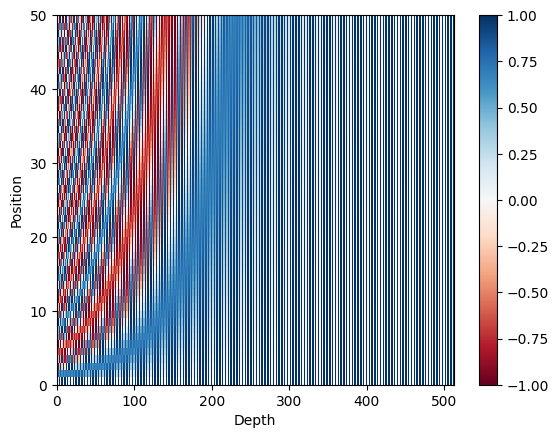

In [ ]:
pos_encoding = positional_encoding(50, 512)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

<a class="anchor" id="section14"></a>
<h2 style="color:blue;font-size: 2em;">Masking</h2>

Mask all the pad tokens in the batch of sequence. It ensures that the model does not treat padding as the input. The mask indicates where pad value `0` is present: it outputs a `1` at those locations, and a `0` otherwise.

In [ ]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
  
  # add extra dimensions to add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [ ]:
x = tf.constant([[7, 6, 0, 0, 1], [1, 2, 3, 0, 0], [0, 0, 0, 4, 5]])
create_padding_mask(x)

<tf.Tensor: shape=(3, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 0.]]],


       [[[0., 0., 0., 1., 1.]]],


       [[[1., 1., 1., 0., 0.]]]], dtype=float32)>

The look-ahead mask is used to mask the future tokens in a sequence. In other words, the mask indicates which entries should not be used.

This means that to predict the third word, only the first and second word will be used. Similarly to predict the fourth word, only the first, second and the third word will be used and so on.

In [ ]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [ ]:
x = tf.random.uniform((1, 3))
temp = create_look_ahead_mask(x.shape[1])
temp

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

<a class="anchor" id="section14"></a>
<h2 style="color:blue;font-size: 2em;">4. Scaled dot product attention</h2>

<img src="https://www.tensorflow.org/images/tutorials/transformer/scaled_attention.png" width="500" alt="scaled_dot_product_attention">

The attention function used by the transformer takes three inputs: Q (query), K (key), V (value). The equation used to calculate the attention weights is:

$$\Large{Attention(Q, K, V) = softmax_k(\frac{QK^T}{\sqrt{d_k}}) V} $$

The dot-product attention is scaled by a factor of square root of the depth. This is done because for large values of depth, the dot product grows large in magnitude pushing the softmax function where it has small gradients resulting in a very hard softmax. 

For example, consider that `Q` and `K` have a mean of 0 and variance of 1. Their matrix multiplication will have a mean of 0 and variance of `dk`. Hence, *square root of `dk`* is used for scaling (and not any other number) because the matmul of `Q` and `K` should have a mean of 0 and variance of 1, and you get a gentler softmax.

The mask is multiplied with -1e9 (close to negative infinity). This is done because the mask is summed with the scaled matrix multiplication of Q and K and is applied immediately before a softmax. The goal is to zero out these cells, and large negative inputs to softmax are near zero in the output.

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.
  
  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.
    
  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  
  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)  

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

As the softmax normalization is done on K, its values decide the amount of importance given to Q.

The output represents the multiplication of the attention weights and the V (value) vector. This ensures that the words you want to focus on are kept as-is and the irrelevant words are flushed out.

In [ ]:
def print_out(q, k, v):
  temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
  print ('Attention weights are:')
  print (temp_attn)
  print ('Output is:')
  print (temp_out)

In [ ]:
np.set_printoptions(suppress=True)

temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)

# This `query` aligns with the second `key`,
# so the second `value` is returned.
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [ ]:
# This query aligns with a repeated key (third and fourth), 
# so all associated values get averaged.
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [ ]:
# This query aligns equally with the first and second key, 
# so their values get averaged.
temp_q = tf.constant([[10, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.5 0.5 0.  0. ]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[5.5 0. ]], shape=(1, 2), dtype=float32)


Pass all the queries together.

In [ ]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
Output is:
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


<a class="anchor" id="section14"></a>
<h2 style="color:blue;font-size: 2em;">5. Multi-head attention</h2>

<img src="https://www.tensorflow.org/images/tutorials/transformer/multi_head_attention.png" width="500" alt="multi-head attention">


Multi-head attention consists of four parts:
*    Linear layers and split into heads.
*    Scaled dot-product attention.
*    Concatenation of heads.
*    Final linear layer.

Each multi-head attention block gets three inputs; Q (query), K (key), V (value). These are put through linear (Dense) layers and split up into multiple heads. 

The `scaled_dot_product_attention` defined above is applied to each head (broadcasted for efficiency). An appropriate mask must be used in the attention step.  The attention output for each head is then concatenated (using `tf.transpose`, and `tf.reshape`) and put through a final `Dense` layer.

Instead of one single attention head, Q, K, and V are split into multiple heads because it allows the model to jointly attend to information at different positions from different representational spaces. After the split each head has a reduced dimensionality, so the total computation cost is the same as a single head attention with full dimensionality.

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model
    
    assert d_model % self.num_heads == 0
    
    self.depth = d_model // self.num_heads
    
    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)
    
    self.dense = tf.keras.layers.Dense(d_model)
        
  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])
    
  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]
    
    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)
    
    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
    
    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)
    
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
    return output, attention_weights

Create a `MultiHeadAttention` layer to try out. At each location in the sequence, `y`, the `MultiHeadAttention` runs all 8 attention heads across all other locations in the sequence, returning a new vector of the same length at each location.

In [ ]:
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((1, 60, 512))  # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

(TensorShape([1, 60, 512]), TensorShape([1, 8, 60, 60]))

<a class="anchor" id="section15"></a>
<h2 style="color:blue;font-size: 2em;">6. Point wise feed forward network</h2>

Point wise feed forward network consists of two fully-connected layers with a ReLU activation in between.

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [ ]:
sample_ffn = point_wise_feed_forward_network(512, 2048)
sample_ffn(tf.random.uniform((64, 50, 512))).shape

TensorShape([64, 50, 512])

<a class="anchor" id="section16"></a>
<h2 style="color:blue;font-size: 2em;">7. Encoder and decoder</h2>

<img src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png" width="600" alt="transformer">

The transformer model follows the same general pattern as a standard. 

* The input sentence is passed through `N` encoder layers that generates an output for each word/token in the sequence.
* The decoder attends on the encoder's output and its own input (self-attention) to predict the next word. 

<a class="anchor" id="section17"></a>
<h2 style="color:blue;font-size: 2em;">Encoder layer</h2>

Each encoder layer consists of sublayers:

1.   Multi-head attention (with padding mask) 
2.    Point wise feed forward networks. 

Each of these sublayers has a residual connection around it followed by a layer normalization. Residual connections help in avoiding the vanishing gradient problem in deep networks.

The output of each sublayer is `LayerNorm(x + Sublayer(x))`. The normalization is done on the `d_model` (last) axis. There are N encoder layers in the transformer.

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    
  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)
    
    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
    
    return out2

In [ ]:
sample_encoder_layer = EncoderLayer(512, 8, 2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

<a class="anchor" id="section18"></a>
<h2 style="color:blue;font-size: 2em;">Decoder layer</h2>

Each decoder layer consists of sublayers:

1.   Masked multi-head attention (with look ahead mask and padding mask)
2.   Multi-head attention (with padding mask). V (value) and K (key) receive the *encoder output* as inputs. Q (query) receives the *output from the masked multi-head attention sublayer.*
3.   Point wise feed forward networks

Each of these sublayers has a residual connection around it followed by a layer normalization. The output of each sublayer is `LayerNorm(x + Sublayer(x))`. The normalization is done on the `d_model` (last) axis.

There are N decoder layers in the transformer.

As Q receives the output from decoder's first attention block, and K receives the encoder output, the attention weights represent the importance given to the decoder's input based on the encoder's output. In other words, the decoder predicts the next word by looking at the encoder output and self-attending to its own output. See the demonstration above in the scaled dot product attention section.

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)
 
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):
    # enc_output.shape == (batch_size, input_seq_len, d_model)

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)
    
    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)
    
    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)
    
    return out3, attn_weights_block1, attn_weights_block2

In [ ]:
sample_decoder_layer = DecoderLayer(512, 8, 2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    tf.random.uniform((64, 50, 512)), sample_encoder_layer_output, 
    False, None, None)

sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

TensorShape([64, 50, 512])

<a class="anchor" id="section19"></a>
<h2 style="color:blue;font-size: 2em;">Encoder</h2>

The `Encoder` consists of:
1.   Input Embedding
2.   Positional Encoding
3.   N encoder layers

The input is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the encoder layers. The output of the encoder is the input to the decoder.

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, 
                                            self.d_model)
    
    
    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
  
    self.dropout = tf.keras.layers.Dropout(rate)
        
  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]
    
    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)
    
    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)
    
    return x  # (batch_size, input_seq_len, d_model)

In [ ]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, input_vocab_size=8500,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print (sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 512)


<a class="anchor" id="section20"></a>
<h2 style="color:blue;font-size: 2em;">Decoder</h2>

 The `Decoder` consists of:
1.   Output Embedding
2.   Positional Encoding
3.   N decoder layers

The target is put through an embedding which is summed with the positional encoding. The output of this summation is the input to the decoder layers. The output of the decoder is the input to the final linear layer.

In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
    
    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}
    
    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]
    
    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)
      
      attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
    # x.shape == (batch_size, target_seq_len, d_model)
    return x, attention_weights

In [ ]:
sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, target_vocab_size=8000,
                         maximum_position_encoding=5000)
temp_input = tf.random.uniform((64, 26), dtype=tf.int64, minval=0, maxval=200)

output, attn = sample_decoder(temp_input, 
                              enc_output=sample_encoder_output, 
                              training=False,
                              look_ahead_mask=None, 
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

<a class="anchor" id="section21"></a>
<h1 style="color:blue;font-size: 2em;">8. Create the Transformer</h1>

Transformer consists of the encoder, decoder and a final linear layer. The output of the decoder is the input to the linear layer and its output is returned.

In [ ]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
  def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
    
    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)
    
    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
    
    return final_output, attention_weights

In [ ]:
sample_transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048, 
    input_vocab_size=8500, target_vocab_size=8000, 
    pe_input=10000, pe_target=6000)

temp_input = tf.random.uniform((64, 38), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((64, 36), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer(temp_input, temp_target, training=False, 
                               enc_padding_mask=None, 
                               look_ahead_mask=None,
                               dec_padding_mask=None)

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)

TensorShape([64, 36, 8000])

<a class="anchor" id="section22"></a>
<h1 style="color:blue;font-size: 2em;">9. Set hyperparameters</h1>

To keep this example small and relatively fast, the values for *num_layers, d_model, and dff* have been reduced. 

The values used in the base model of transformer were; *num_layers=6*, *d_model = 512*, *dff = 2048*. See the [paper](https://arxiv.org/abs/1706.03762) for all the other versions of the transformer.

Note: By changing the values below, you can get the model that achieved state of the art on many tasks.

In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8

input_vocab_size = tokenizer_pt.vocab_size + 2
target_vocab_size = tokenizer_en.vocab_size + 2
dropout_rate = 0.1

<a class="anchor" id="section23"></a>
<h1 style="color:blue;font-size: 2em;">10. Optimizer</h1>

Use the Adam optimizer with a custom learning rate scheduler according to the formula in the [paper](https://arxiv.org/abs/1706.03762).

$$\Large{lrate = d_{model}^{-0.5} * min(step{\_}num^{-0.5}, step{\_}num * warmup{\_}steps^{-1.5})}$$


In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    
    step = tf.cast(step, tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

**Alter Discussion**
* Here I edit some of the code because of an error I found in the opearation of RSQR

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

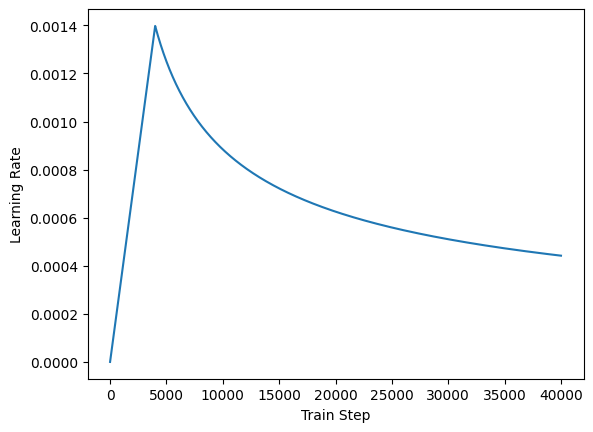

In [ ]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

<a class="anchor" id="section24"></a>
<h1 style="color:blue;font-size: 2em;">11. Loss and metrics</h1>

Since the target sequences are padded, it is important to apply a padding mask when calculating the loss.

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  
  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

<a class="anchor" id="section25"></a>
<h1 style="color:blue;font-size: 2em;">11. Training and checkpointing</h1>

In [ ]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

In [ ]:
def create_masks(inp, tar):
  # Encoder padding mask
  enc_padding_mask = create_padding_mask(inp)
  
  # Used in the 2nd attention block in the decoder.
  # This padding mask is used to mask the encoder outputs.
  dec_padding_mask = create_padding_mask(inp)
  
  # Used in the 1st attention block in the decoder.
  # It is used to pad and mask future tokens in the input received by 
  # the decoder.
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
  return enc_padding_mask, combined_mask, dec_padding_mask

Create the checkpoint path and the checkpoint manager. This will be used to save checkpoints every `n` epochs.

In [ ]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

The target is divided into tar_inp and tar_real. tar_inp is passed as an input to the decoder. `tar_real` is that same input shifted by 1: At each location in `tar_input`, `tar_real` contains the  next token that should be predicted.

For example, `sentence` = "SOS A lion in the jungle is sleeping EOS"

`tar_inp` =  "SOS A lion in the jungle is sleeping"

`tar_real` = "A lion in the jungle is sleeping EOS"

The transformer is an auto-regressive model: it makes predictions one part at a time, and uses its output so far to decide what to do next. 

During training this example uses teacher-forcing. Teacher forcing is passing the true output to the next time step regardless of what the model predicts at the current time step.

As the transformer predicts each word, *self-attention* allows it to look at the previous words in the input sequence to better predict the next word.

To prevent the model from peeking at the expected output the model uses a look-ahead mask.

In [ ]:
EPOCHS = 20

In [ ]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.

train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]
  
  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  
  with tf.GradientTape() as tape:
    predictions, _ = transformer(inp, tar_inp, 
                                 True, 
                                 enc_padding_mask, 
                                 combined_mask, 
                                 dec_padding_mask)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)    
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  train_loss(loss)
  train_accuracy(tar_real, predictions)

Portuguese is used as the input language and English is the target language.

In [ ]:
for epoch in range(EPOCHS):
  start = time.time()
  
  train_loss.reset_states()
  train_accuracy.reset_states()
  
  # inp -> portuguese, tar -> english
  for (batch, (inp, tar)) in enumerate(train_dataset):
    train_step(inp, tar)
    
    if batch % 50 == 0:
      print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(
          epoch + 1, batch, train_loss.result(), train_accuracy.result()))
      
  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
  print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, 
                                                train_loss.result(), 
                                                train_accuracy.result()))

  print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 9.0143 Accuracy 0.0004
Epoch 1 Batch 50 Loss 8.9542 Accuracy 0.0008
Epoch 1 Batch 100 Loss 8.8569 Accuracy 0.0119
Epoch 1 Batch 150 Loss 8.7502 Accuracy 0.0170
Epoch 1 Batch 200 Loss 8.6206 Accuracy 0.0195
Epoch 1 Batch 250 Loss 8.4641 Accuracy 0.0215
Epoch 1 Batch 300 Loss 8.2859 Accuracy 0.0247
Epoch 1 Batch 350 Loss 8.1005 Accuracy 0.0290
Epoch 1 Batch 400 Loss 7.9191 Accuracy 0.0326
Epoch 1 Batch 450 Loss 7.7529 Accuracy 0.0358
Epoch 1 Batch 500 Loss 7.6092 Accuracy 0.0386
Epoch 1 Batch 550 Loss 7.4769 Accuracy 0.0420
Epoch 1 Batch 600 Loss 7.3512 Accuracy 0.0457
Epoch 1 Batch 650 Loss 7.2338 Accuracy 0.0492
Epoch 1 Batch 700 Loss 7.1196 Accuracy 0.0526
Epoch 1 Loss 7.1153 Accuracy 0.0527
Time taken for 1 epoch: 203.0406949520111 secs

Epoch 2 Batch 0 Loss 5.3157 Accuracy 0.1034
Epoch 2 Batch 50 Loss 5.4783 Accuracy 0.1045
Epoch 2 Batch 100 Loss 5.4440 Accuracy 0.1052
Epoch 2 Batch 150 Loss 5.3907 Accuracy 0.1075
Epoch 2 Batch 200 Loss 5.3375 Accuracy 0.1094
Ep

<a class="anchor" id="section26"></a>
<h1 style="color:blue;font-size: 2em;">13. Evaluate</h1>

The following steps are used for evaluation:

* Encode the input sentence using the Portuguese tokenizer (`tokenizer_pt`). Moreover, add the start and end token so the input is equivalent to what the model is trained with. This is the encoder input.
* The decoder input is the `start token == tokenizer_en.vocab_size`.
* Calculate the padding masks and the look ahead masks.
* The `decoder` then outputs the predictions by looking at the `encoder output` and its own output (self-attention).
* Select the last word and calculate the argmax of that.
* Concatentate the predicted word to the decoder input as pass it to the decoder.
* In this approach, the decoder predicts the next word based on the previous words it predicted.

Note: The model used here has less capacity to keep the example relatively faster so the predictions maybe less right. To reproduce the results in the paper, use the entire dataset and base transformer model or transformer XL, by changing the hyperparameters above.

In [ ]:
def evaluate(inp_sentence):
  start_token = [tokenizer_pt.vocab_size]
  end_token = [tokenizer_pt.vocab_size + 1]
  
  # inp sentence is portuguese, hence adding the start and end token
  inp_sentence = start_token + tokenizer_pt.encode(inp_sentence) + end_token
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  # as the target is english, the first word to the transformer should be the
  # english start token.
  decoder_input = [tokenizer_en.vocab_size]
  output = tf.expand_dims(decoder_input, 0)
    
  for i in range(MAX_LENGTH):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    
    # select the last word from the seq_len dimension
    predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    
    # return the result if the predicted_id is equal to the end token
    if predicted_id == tokenizer_en.vocab_size+1:
      return tf.squeeze(output, axis=0), attention_weights
    
    # concatentate the predicted_id to the output which is given to the decoder
    # as its input.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def plot_attention_weights(attention, sentence, result, layer):
  fig = plt.figure(figsize=(16, 8))
  
  sentence = tokenizer_pt.encode(sentence)
  
  attention = tf.squeeze(attention[layer], axis=0)
  
  for head in range(attention.shape[0]):
    ax = fig.add_subplot(2, 4, head+1)
    
    # plot the attention weights
    ax.matshow(attention[head][:-1, :], cmap='viridis')

    fontdict = {'fontsize': 10}
    
    ax.set_xticks(range(len(sentence)+2))
    ax.set_yticks(range(len(result)))
    
    ax.set_ylim(len(result)-1.5, -0.5)
        
    ax.set_xticklabels(
        ['<start>']+[tokenizer_pt.decode([i]) for i in sentence]+['<end>'], 
        fontdict=fontdict, rotation=90)
    
    ax.set_yticklabels([tokenizer_en.decode([i]) for i in result 
                        if i < tokenizer_en.vocab_size], 
                       fontdict=fontdict)
    
    ax.set_xlabel('Head {}'.format(head+1))
  
  plt.tight_layout()
  plt.show()

In [ ]:
def translate(sentence, plot=''):
  result, attention_weights = evaluate(sentence)
  
  predicted_sentence = tokenizer_en.decode([i for i in result 
                                            if i < tokenizer_en.vocab_size])  

  print('Input: {}'.format(sentence))
  print('Predicted translation: {}'.format(predicted_sentence))
  
  if plot:
    plot_attention_weights(attention_weights, sentence, result, plot)

In [ ]:
translate("este é um problema que temos que resolver.")
print ("Real translation: this is a problem we have to solve .")

Input: este é um problema que temos que resolver.
Predicted translation: this is a problem we have to deal with .
Real translation: this is a problem we have to solve .


In [ ]:
translate("os meus vizinhos ouviram sobre esta ideia.")
print ("Real translation: and my neighboring homes heard about this idea .")

Input: os meus vizinhos ouviram sobre esta ideia.
Predicted translation: my neighbors heard about this idea .
Real translation: and my neighboring homes heard about this idea .


In [ ]:
translate("vou então muito rapidamente partilhar convosco algumas histórias de algumas coisas mágicas que aconteceram.")
print ("Real translation: so i 'll just share with you some stories very quickly of some magical things that have happened .")

Input: vou então muito rapidamente partilhar convosco algumas histórias de algumas coisas mágicas que aconteceram.
Predicted translation: so i 'm going to share with you a few very quickly stories of some magic things , and then i 'm going to happen .
Real translation: so i 'll just share with you some stories very quickly of some magical things that have happened .


You can pass different layers and attention blocks of the decoder to the `plot` parameter.

In [ ]:
# # Pin matplotlib version to 3.2.2 since in the latest version
# # transformer.ipynb fails with the following error:
# # https://stackoverflow.com/questions/62953704/valueerror-the-number-of-fixedlocator-locations-5-usually-from-a-call-to-set
# !pip install matplotlib==3.2.2
# then we could call the translate function with plot parameter:
# translate("este é o primeiro livro que eu fiz.", plot='decoder_layer4_block2')
# print ("Real translation: this is the first book i've ever done.")

In [ ]:
translate("este é o primeiro livro que eu fiz.")
print ("Real translation: this is the first book i've ever done.")

Input: este é o primeiro livro que eu fiz.
Predicted translation: this is the first book i dod.s .
Real translation: this is the first book i've ever done.


<a class="anchor" id="section27"></a>
<h1 style="color:blue;font-size: 2em;">13. Summary</h1>

In this tutorial, you learned about positional encoding, multi-head attention, the importance of masking and how to create a transformer.

Try using a different dataset to train the transformer. You can also create the base transformer or transformer XL by changing the hyperparameters above. You can also use the layers defined here to create [BERT](https://arxiv.org/abs/1810.04805) and train state of the art models. Futhermore, you can implement beam search to get better predictions.